# **Импорт данных**

In [48]:
from io import StringIO
import requests
import pandas as pd
archive_url = "https://archive.ics.uci.edu/static/public/759/glioma+grading+clinical+and+mutation+features+dataset.zip"
request_content = requests.get(archive_url).content
str_stream = StringIO(request_content.split(b"TCGA_GBM_LGG_Mutations_all.csv")[1][3:].split(b"{")[0].rsplit(b'PK', 1)[0].decode('utf-8'))
dataset = pd.read_csv(str_stream)
dataset.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [59]:
# экспорт данных в csv
dataset.to_csv('glioma_grading_clinical_and_mutation_features_dataset.csv', encoding='utf-8')

# **Предобработка**

In [42]:
# библиотеки для предобработки
from sklearn.preprocessing import LabelEncoder
import re

In [49]:
# нахождение уникальных значений всех полей кроме генов
print('уникальные значения всех полей:')
print('Grade:', dataset['Grade'].unique(), end = '\n\n')
print('Primary_Diagnosis:', dataset['Primary_Diagnosis'].unique(), end = '\n\n')
print('Gender:', dataset['Gender'].unique(), end = '\n\n')
print('Race:', dataset['Race'].unique(), end = '\n\n')

print('количество пропущенных и редких значений:')
print(len(dataset[dataset['Gender'] == '--']), '     Gender = --')
print(len(dataset[dataset['Primary_Diagnosis'] == '--']), '     Primary_Diagnosis = --')
print(len(dataset[dataset['Race'] == '--']), '     Race = --')
print(len(dataset[dataset['Race'] == 'not reported']), '    Race = not reported')
print(len(dataset[dataset['Race'] == 'american indian or alaska native']), '     Race = american indian or alaska native')
print(len(dataset[dataset['Race'] == 'black or african american']), '    Race = black or african american')
print(len(dataset[dataset['Race'] == 'asian']), '    Race = asian')
print(len(dataset[dataset['Race'] == 'white']), '   Race = white')


уникальные значения всех полей:
Grade: ['LGG' 'GBM']

Primary_Diagnosis: ['Oligodendroglioma, NOS' 'Mixed glioma' 'Astrocytoma, NOS'
 'Astrocytoma, anaplastic' 'Oligodendroglioma, anaplastic' '--'
 'Glioblastoma']

Gender: ['Male' 'Female' '--']

Race: ['white' 'asian' 'black or african american' '--' 'not reported'
 'american indian or alaska native']

количество пропущенных и редких значений:
4      Gender = --
4      Primary_Diagnosis = --
4      Race = --
18     Race = not reported
1      Race = american indian or alaska native
59     Race = black or african american
14     Race = asian
766    Race = white


In [36]:
# поиск пропущенных или иных значений кроме MUTATED и	NOT_MUTATED	среди генов
cols_mutated = dataset.columns[7:]
for i in cols_mutated:
  if len(dataset[i].unique()) != 2:
    print(i, dataset[i].unique(), end = '\n\n')

In [50]:
# удаление пропущенных строк
dataset = dataset[
    (dataset['Gender'] != '--') &
    (dataset['Primary_Diagnosis'] != '--') &
    (dataset['Race'] != '--') &
    (dataset['Race'] != 'not reported') &
    (dataset['Race'] != 'american indian or alaska native')
]
print('удалено:',862-839, 'строки')

удалено: 23 строки


In [51]:
# кодирование категориальных полей
le = LabelEncoder()

df = dataset.copy()

category_cols = dataset.columns.difference(['Case_ID', 'Age_at_diagnosis']) # выбор категориальных признаков

for i in category_cols: # преобразование в категориальный тип
  df[i] = le.fit_transform(df[i])


# препроцессинг данных - перевод возраста пациента в численный тип (года с дробной частью)
def age_to_float(age): # функция для переобразования возраста пациента
    # извлечение чисел перед словами 'years' и 'days'
    years_match = re.search(r'(\d+)\s*years', age)
    days_match = re.search(r'(\d+)\s*days', age)

    years = int(years_match.group(1)) if years_match else 0
    days = int(days_match.group(1)) if days_match else 0

    return years + days / 365.25  # округлённый перевод дней в годы

df['Age_at_diagnosis'] = df['Age_at_diagnosis'].apply(age_to_float)
df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1,1,TCGA-DU-8164,1,51.295688,4,2,0,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,TCGA-QH-A6CY,1,38.714579,3,2,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,TCGA-HW-A5KM,1,35.169747,0,2,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,1,TCGA-E1-A7YE,0,32.774812,1,2,0,0,0,...,1,1,1,1,1,1,1,1,0,1
4,1,1,TCGA-S9-A6WG,1,31.511978,1,2,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,0,0,TCGA-19-5959,0,77.889802,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
858,0,0,TCGA-16-0846,1,85.177960,2,2,1,0,1,...,1,1,1,1,1,1,1,1,1,1
859,0,0,TCGA-28-1746,0,77.487337,2,2,1,0,1,...,1,1,1,1,1,1,1,1,1,1
860,0,0,TCGA-32-2491,1,63.331280,2,2,1,0,1,...,1,0,1,1,1,1,1,1,1,1


In [45]:
# информация о поле возраста
df['Age_at_diagnosis'].describe()

,Age_at_diagnosis
count,862.000000
mean,50.628748
std,16.157226
min,0.000000
25%,37.440110
50%,51.390144
75%,62.634497
max,89.287474


In [52]:
# удаление всех нулевых значений возраста - не будем рассматривать пациентов с опухолями с рождения
df = df[df['Age_at_diagnosis'] != 0]
min_age = df['Age_at_diagnosis'].min()
print(f"Минимальный возраст: {min_age}")
max_age = df['Age_at_diagnosis'].max()
print(f"Максимальный возраст: {max_age}")

Минимальный возраст: 14.421629021218344
Максимальный возраст: 89.28747433264887


In [53]:
# переиндексация датасета
df.reset_index(drop=True, inplace=True)

total_nulls = df.isnull().sum().sum()
print(f"Количество пустых значений в датасете: {total_nulls}")
print(f"Количество удаленных строк : {862 - len(df)}")

Количество пустых значений в датасете: 0
Количество удаленных строк : 24


# **Визуализации**

In [59]:
# библиотеки для визуализаций
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

##Боксплот возраста по диагнозу

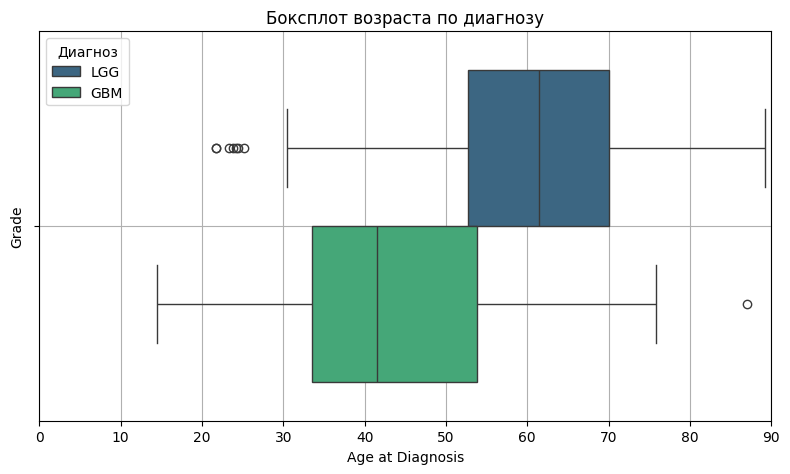

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age_at_diagnosis', hue='Grade', palette='viridis')

plt.legend(['LGG', 'GBM'],title='Диагноз', loc='upper left')

plt.title('Боксплот возраста по диагнозу')
plt.suptitle('')
plt.ylabel('Grade')
plt.xlabel('Age at Diagnosis')
plt.xlim(0,90)
plt.tight_layout()
plt.grid()
plt.show()

##Распределение пациентов по расе и диагнозу

<ipython-input-56-1679914329>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


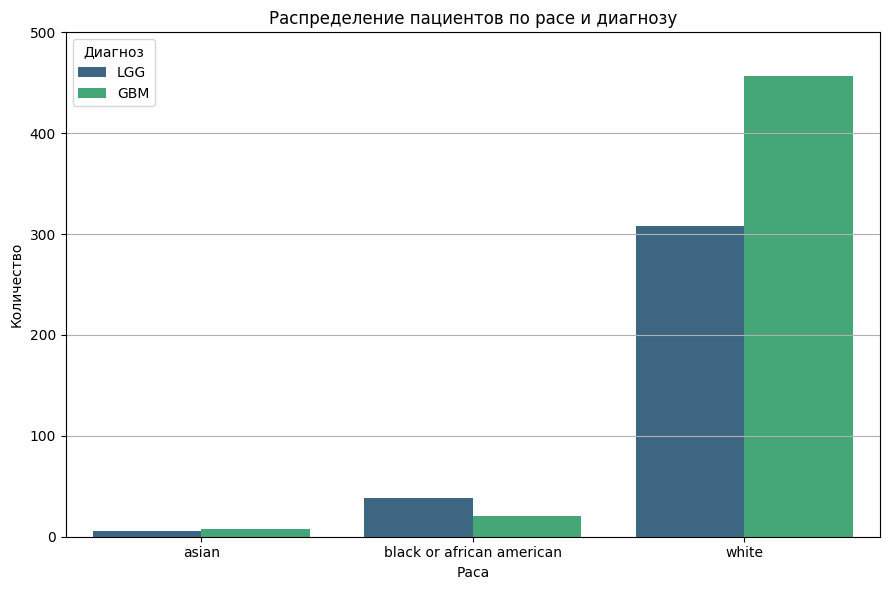

In [56]:
plt.figure(figsize=(9, 6))
ax = sns.countplot(data=df, x='Race', hue='Grade', palette='viridis')

custom_labels = ['asian', 'black or african american', 'white']
ax.set_xticklabels(custom_labels)

plt.title('Распределение пациентов по расе и диагнозу')
plt.xlabel('Раса')
plt.ylabel('Количество')
plt.legend(['LGG', 'GBM'],title='Диагноз', loc='upper left')
plt.tight_layout()
plt.ylim(0,500)
plt.grid(axis='y')
plt.show()

##Распределение пациентов по полу и оценке (Grade)

<ipython-input-246-af96e31fd1ab>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


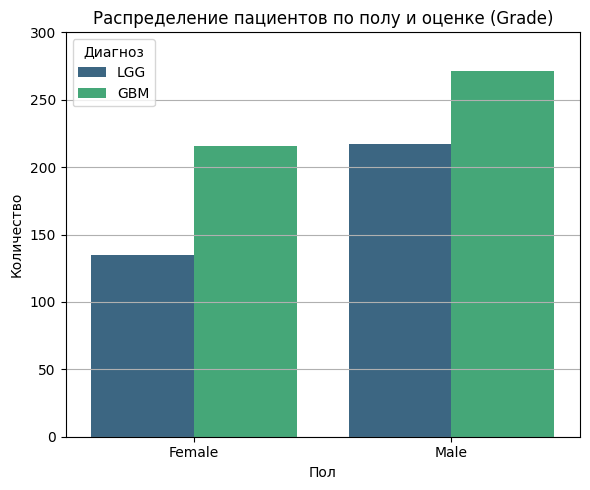

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Gender', hue='Grade', palette='viridis')

custom_labels = ['Female', 'Male']
ax.set_xticklabels(custom_labels)

plt.title('Распределение пациентов по полу и оценке (Grade)')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(['LGG', 'GBM'],title='Диагноз', loc='upper left')
plt.tight_layout()
plt.ylim(0,300)
plt.grid(axis='y')
plt.show()

##График распределения генов мутаций по диагнозу

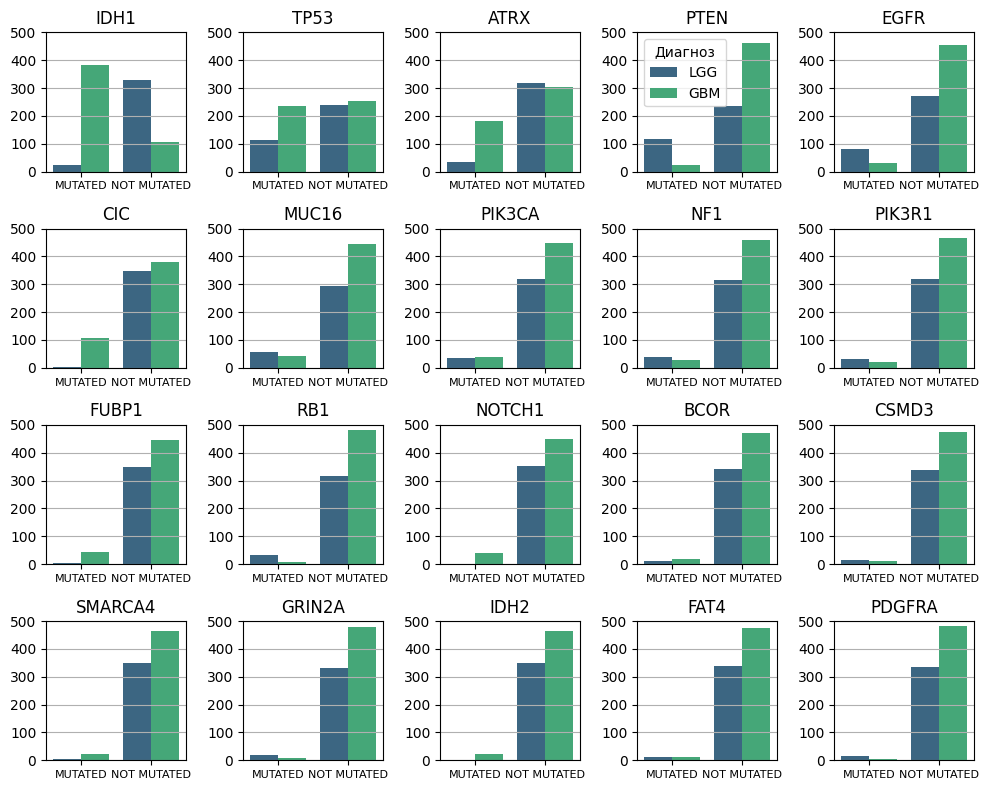

In [ ]:
genes_list = dataset.columns[7:]

fig, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()
custom_labels = ['MUTATED', 'NOT MUTATED']

for i, gene in enumerate(genes_list):
    sns.countplot(data=df, x=gene, hue='Grade', palette='viridis', ax=axes[i])
    axes[i].set_title(gene)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].grid(axis='y')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(custom_labels, fontsize = 8)
    axes[i].set_ylim(0,500)

    if i==3:
      axes[i].legend(['LGG', 'GBM'],title='Диагноз', loc='upper left')
    else:
      axes[i].legend_.remove()

plt.tight_layout()
plt.show()

##Общее распределение мутаций генов

<ipython-input-57-3431770745>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels, fontsize = 8)


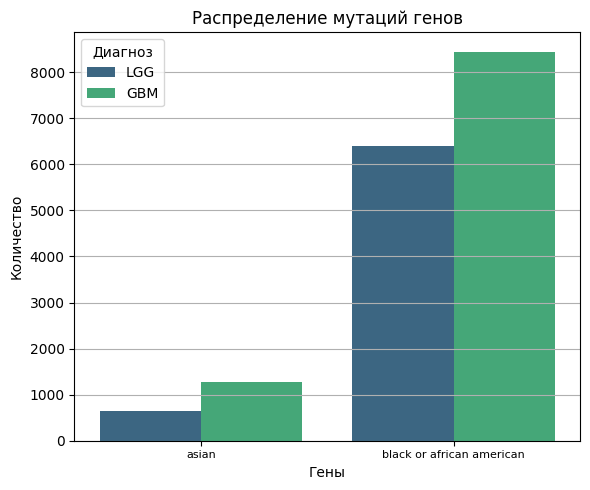

In [57]:
cols_mutated = dataset.columns[7:]
df_long = df.melt(id_vars='Grade', value_vars=cols_mutated, value_name='Mutation')

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_long, x='Mutation', hue='Grade', palette='viridis')
ax.legend(['LGG', 'GBM'],title='Диагноз', loc='upper left')
ax.set_xticklabels(custom_labels, fontsize = 8)

plt.title('Распределение мутаций генов')
plt.xlabel('Гены')
plt.ylabel('Количество')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## График распределения количества LGG и GBM

<ipython-input-58-1817072254>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Grade', palette='viridis')
<ipython-input-58-1817072254>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LGG', 'GBM'], fontsize = 8)


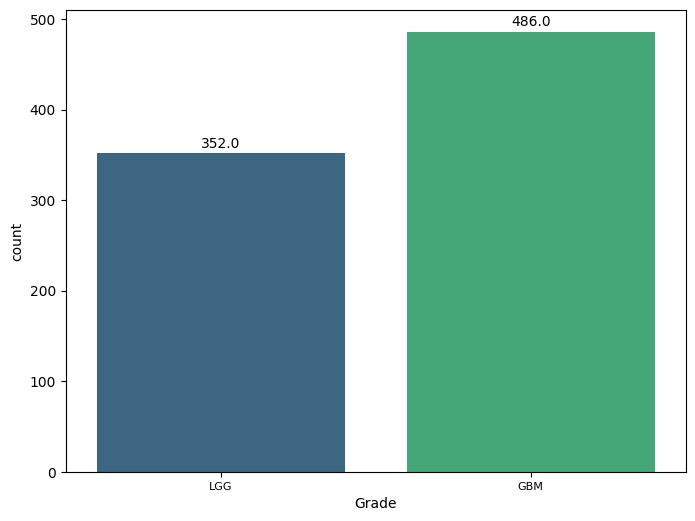

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Grade', palette='viridis')
ax.set_xticklabels(['LGG', 'GBM'], fontsize = 8)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(height), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 2),
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

## Матрица Крамера и p-value

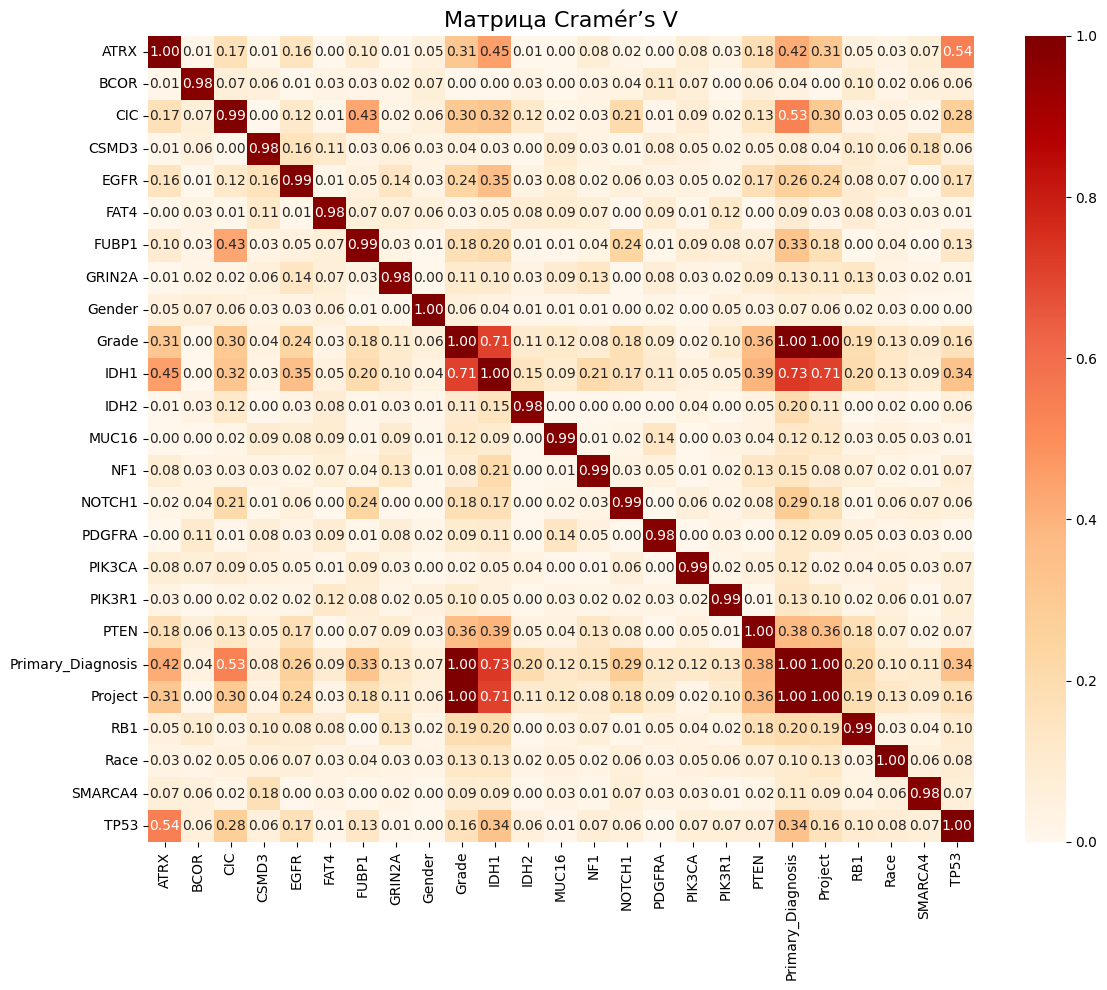

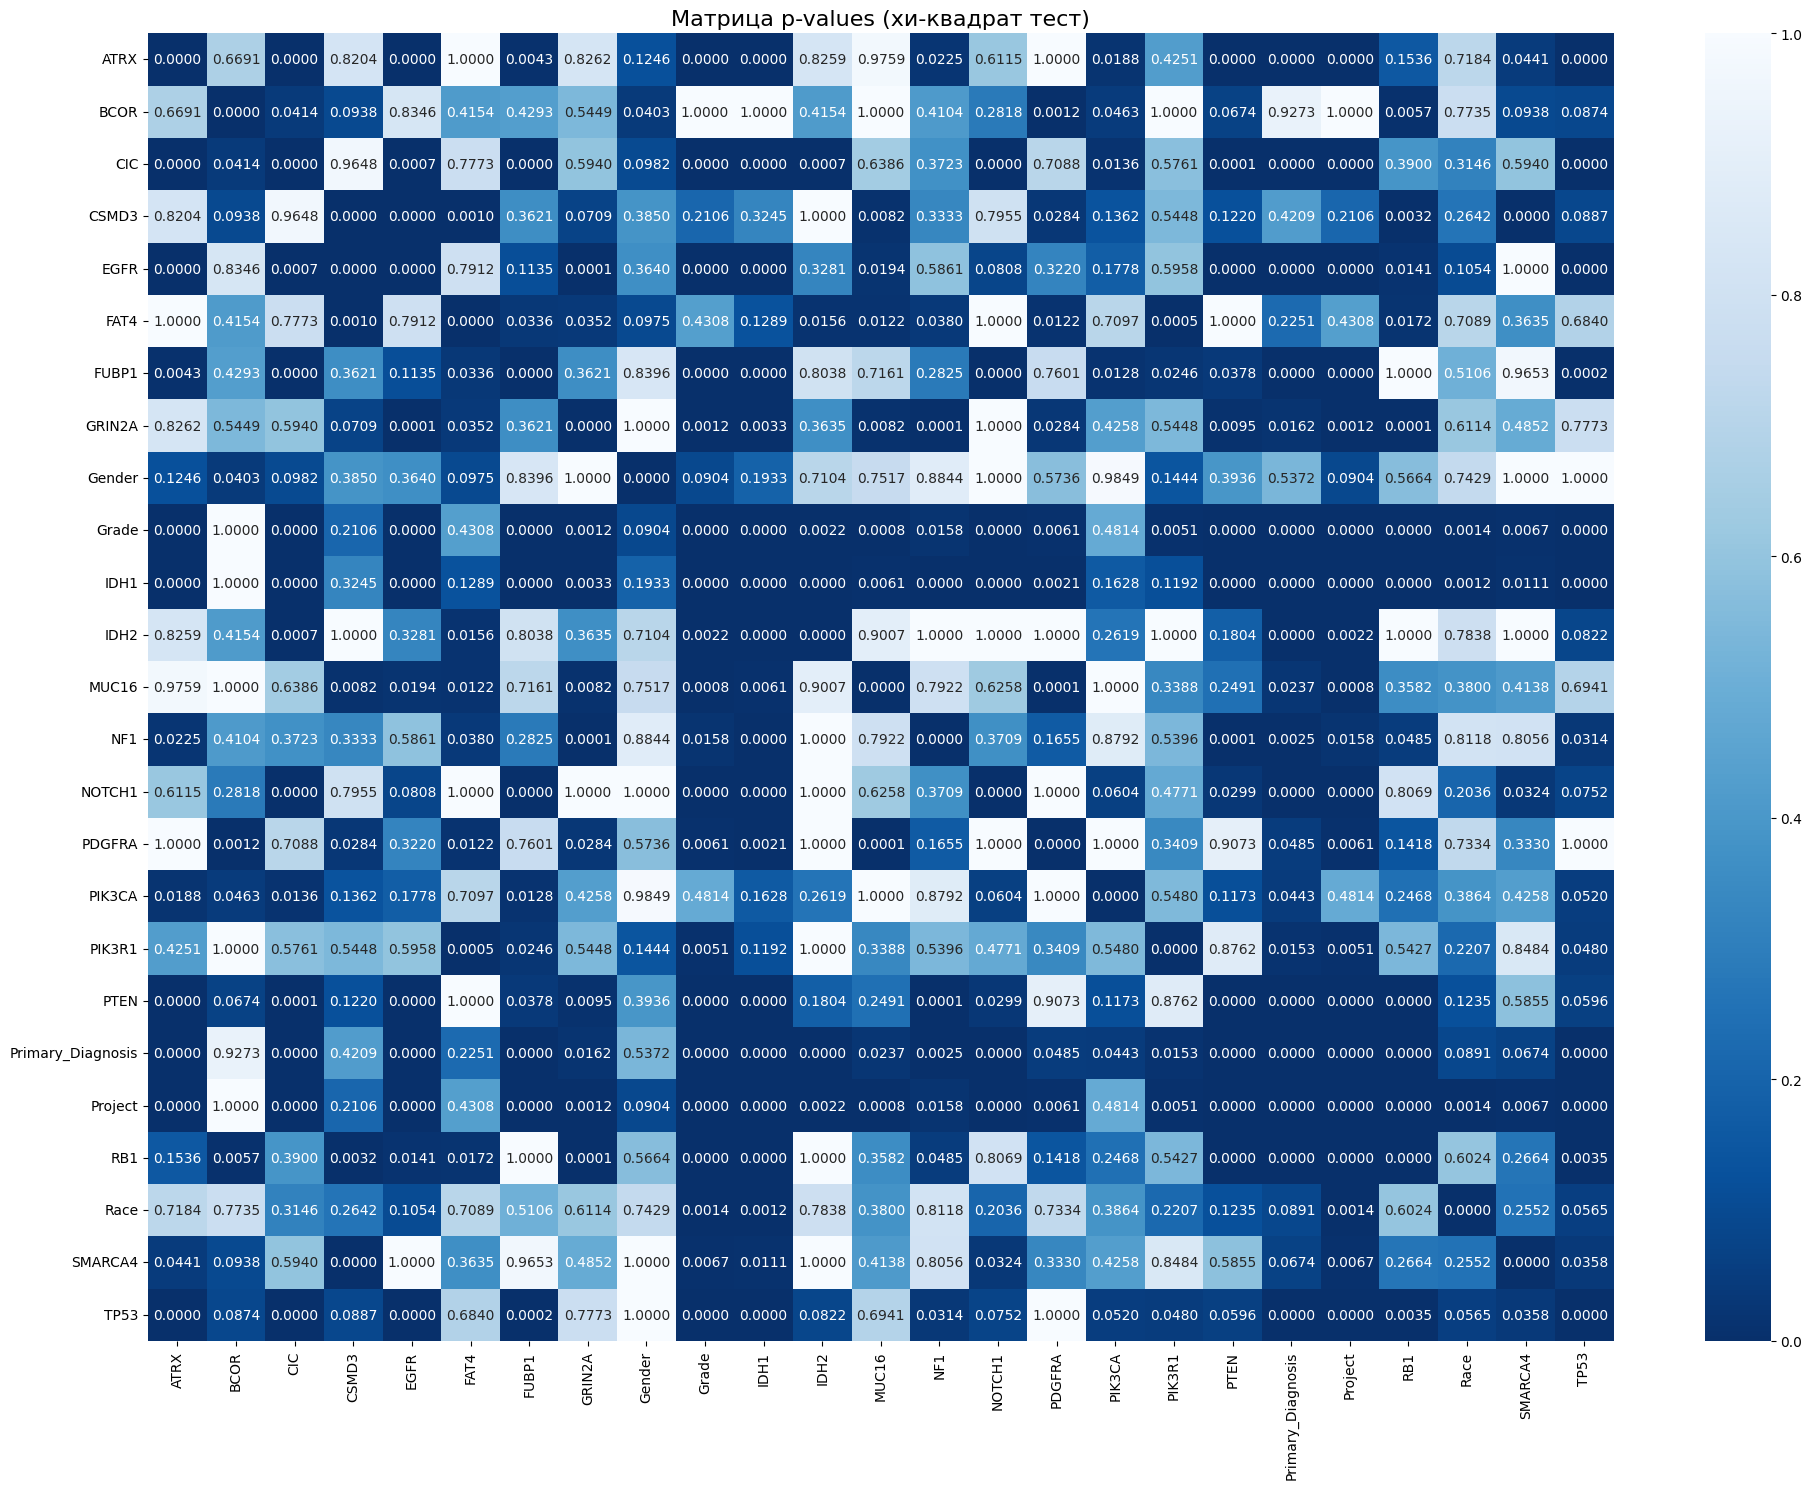

In [60]:
def cramers_v_with_pvalue(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p_value, _, _ = chi2_contingency(confusion_matrix)
    phi2 = chi2 / confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    cramers_v = np.sqrt(phi2 / min(k-1, r-1))
    return cramers_v, p_value

category_cols = dataset.columns.difference(['Case_ID', 'Age_at_diagnosis'])

cramers_results = pd.DataFrame(np.zeros((len(category_cols), len(category_cols))),
                              columns=category_cols, index=category_cols)
pvalue_matrix = pd.DataFrame(np.zeros((len(category_cols), len(category_cols))),
                            columns=category_cols, index=category_cols)

# Заполнение матриц
for col1 in category_cols:
    for col2 in category_cols:
        cramers_v, p_value = cramers_v_with_pvalue(df[col1], df[col2])
        cramers_results.loc[col1, col2] = cramers_v
        pvalue_matrix.loc[col1, col2] = p_value

# Визуализация матрицы Крамера
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_results, annot=True, cmap="OrRd", fmt=".2f")
plt.title("Матрица Cramér’s V", fontsize=16)
plt.tight_layout()
plt.show()

# Визуализация матрицы p-values
plt.figure(figsize=(20, 15))
sns.heatmap(pvalue_matrix, annot=True, cmap="Blues_r", fmt=".4f")
plt.title("Матрица p-values (хи-квадрат тест)", fontsize=16)
plt.tight_layout()
plt.show()

Вывод: наибольшее влияние на целевой признак оказывает признаки IDH1 и PTEN.

Зависимость между Grade и Primary_diagnosis, Grade и Project - линейная, так как в названии проекта присутствует оценка, и каждая оценка имеет свой набор предварительных диагнозов, которые не пересекаются.

Поэтому признаки Primary_diagnosis и Project не будут использоваться при обучении модели.

# **Random forest**

In [72]:
# библиотеки для случайного леса
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
import numpy as np

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

## Модель без балансировки классов

In [94]:
''' без балансировки классов '''

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Создание модели с взвешиванием классов
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               min_samples_leaf = 5,
                               max_depth=30,
                               random_state=42)
# обучение модели
model.fit(X_train, y_train)

# расчет метрик
print('результат со всеми признаками без балансировки классов\n')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

результат со всеми признаками без балансировки классов

Accuracy: 0.8592057761732852
Precision: 0.9256756756756757
Recall: 0.8303030303030303
F1-score: 0.8753993610223643
ROC AUC: 0.9173701298701299
true negatives (GBM верно предсказаны): 101
false negatives (GBM ошибочно предсказаны как LGG): 28
true positives (LGG верно предсказаны): 137
false positives (LGG ошибочно предсказаны как GBM): 11


## Модель на всех признаках с весами - сбалансированные и ручные

In [ ]:
''' все признаки '''
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               class_weight="balanced",
                               min_samples_leaf = 5,
                               max_depth=30,
                               random_state=42)

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучение модели
model.fit(X_train, y_train)

# расчет метрик
print('результат со всеми признаками \n')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))


conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

результат со всеми признаками 

Accuracy: 0.8700361010830325
Precision: 0.9448275862068966
Recall: 0.8303030303030303
F1-score: 0.8838709677419355
ROC AUC: 0.9169642857142857
true negatives (GBM верно предсказаны): 104
false negatives (GBM ошибочно предсказаны как LGG): 28
true positives (LGG верно предсказаны): 137
false positives (LGG ошибочно предсказаны как GBM): 8


In [60]:
''' все признаки + ручные веса '''
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               class_weight="balanced",
                               min_samples_leaf = 5,
                               max_depth=30,
                               random_state=42)

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

class_weights = {
    0: 1,  # Вес для класса LGG
    1: 2.5,  # Вес для класса GBM
}

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Создание модели с взвешиванием классов
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               min_samples_leaf = 5,
                               max_depth=30,
                               random_state=42,
                               class_weight=class_weights)

# обучение модели
model.fit(X_train, y_train)

# расчет метрик
print('результат со всеми признаками + ручные веса \n')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

результат со всеми признаками + ручные веса 

Accuracy: 0.8628158844765343
Precision: 0.8944099378881988
Recall: 0.8727272727272727
F1-score: 0.8834355828220859
ROC AUC: 0.9193452380952382
true negatives (GBM верно предсказаны): 95
false negatives (GBM ошибочно предсказаны как LGG): 21
true positives (LGG верно предсказаны): 144
false positives (LGG ошибочно предсказаны как GBM): 17


In [62]:
# важность признаков
importances = model.feature_importances_

feature_importance = pd.DataFrame({'признак': X.columns, 'важность': importances})
feature_importance = feature_importance.sort_values(by='важность', ascending=False)

print(feature_importance)

             признак  важность
3               IDH1  0.385827
1   Age_at_diagnosis  0.256711
6               PTEN  0.086378
5               ATRX  0.052746
8                CIC  0.036835
20              IDH2  0.027229
14               RB1  0.025800
7               EGFR  0.025606
4               TP53  0.022900
9              MUC16  0.016852
11               NF1  0.010417
0             Gender  0.009865
2               Race  0.009133
15            NOTCH1  0.007067
13             FUBP1  0.006426
10            PIK3CA  0.006172
12            PIK3R1  0.004579
19            GRIN2A  0.003721
22            PDGFRA  0.002486
17             CSMD3  0.001457
18           SMARCA4  0.000850
21              FAT4  0.000636
16              BCOR  0.000307


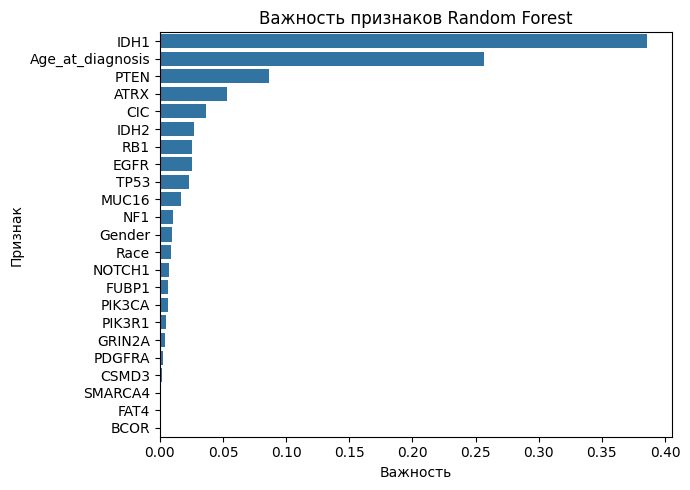

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x='важность', y='признак', data=feature_importance)
plt.title('Важность признаков Random Forest')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

## Модель на лучших признаках по feature importance - сбалансированные классы и ручные веса

In [72]:
''' лучшие признаки по feature importance + сбалансированные классы'''

model = RandomForestClassifier(n_estimators = 500,
                               bootstrap = True,
                               class_weight = "balanced",
                               min_samples_leaf = 8,
                               max_depth = 60,
                               random_state = 41)

X = df[['IDH1', 'Age_at_diagnosis','ATRX','PTEN','CIC','IDH2','TP53','NOTCH1','FUBP1','EGFR','RB1']]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучение модели
model.fit(X_train, y_train)

# расчет метрик
print("лучшие признаки по feature importance + сбалансированные классы\n")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

лучшие признаки по feature importance + сбалансированные классы

Accuracy: 0.8628158844765343
Precision: 0.9440559440559441
Recall: 0.8181818181818182
F1-score: 0.8766233766233766
ROC AUC: 0.91620670995671
true negatives (GBM верно предсказаны): 104
false negatives (GBM ошибочно предсказаны как LGG): 30
true positives (LGG верно предсказаны): 135
false positives (LGG ошибочно предсказаны как GBM): 8


In [73]:
''' лучшие признаки по feature importance + ручные веса '''

class_weights = {
    0: 1,  # Вес для класса 0
    1: 2.5,  # Вес для класса 1
}
model = RandomForestClassifier(n_estimators = 500,
                               bootstrap = True,
                               class_weight = class_weights,
                               min_samples_leaf = 8,
                               max_depth = 60,
                               random_state = 41)

X = df[['IDH1', 'Age_at_diagnosis','ATRX','PTEN','CIC','IDH2','TP53','NOTCH1','FUBP1','EGFR','RB1']]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# обучение модели
model.fit(X_train, y_train)

# расчет метрик
print("лучшие признаки по feature importance + ручные веса\n")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

лучшие признаки по feature importance + ручные веса

Accuracy: 0.8447653429602888
Precision: 0.8674698795180723
Recall: 0.8727272727272727
F1-score: 0.8700906344410876
ROC AUC: 0.9136093073593073
true negatives (GBM верно предсказаны): 90
false negatives (GBM ошибочно предсказаны как LGG): 21
true positives (LGG верно предсказаны): 144
false positives (LGG ошибочно предсказаны как GBM): 22


## 10-кратная кроссвалидация

In [76]:
'''кроссвалидация на всех признаках'''
model = RandomForestClassifier(n_estimators=500,
                               bootstrap = True,
                               class_weight="balanced",
                               min_samples_leaf = 5,
                               max_depth=30,
                               random_state=42)

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 10-кратная кросс-валидация
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

Accuracy for each fold: [0.87719298 0.78571429 0.82142857 0.92857143 0.89285714 0.89285714
 0.89285714 0.83928571 0.82142857 0.92857143]
Mean accuracy: 0.868076441102757


In [77]:
'''расчет метрик лучшей модели'''
results = cross_validate(
    model, X_train, y_train, cv=kfold, scoring='accuracy',
    return_estimator=True
)

# Находим индекс с максимальной точностью
best_fold_idx = np.argmax(results['test_score'])
best_model = results['estimator'][best_fold_idx]

print("Лучшая модель из фолда", best_fold_idx)

# расчет метрик
print("результат с кроссвалидацией\n")
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = best_model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

Лучшая модель из фолда 3
результат с кроссвалидацией

Accuracy: 0.8628158844765343
Precision: 0.9440559440559441
Recall: 0.8181818181818182
F1-score: 0.8766233766233766
ROC AUC: 0.916017316017316
true negatives (GBM верно предсказаны): 104
false negatives (GBM ошибочно предсказаны как LGG): 30
true positives (LGG верно предсказаны): 135
false positives (LGG ошибочно предсказаны как GBM): 8


In [78]:
'''Нахождение важности признаков в лучшей модели'''

if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_

    features = best_model.feature_names_in_ if hasattr(best_model, 'feature_names_in_') else [f"Feature_{i}" for i in range(X_train.shape[1])]

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    print("Важность признаков в лучшей модели:")
    print(importance_df)
else:
    print("Эта модель не поддерживает feature_importances_")

Важность признаков в лучшей модели:
             Feature  Importance
3               IDH1    0.453745
1   Age_at_diagnosis    0.225004
6               PTEN    0.066253
5               ATRX    0.060603
8                CIC    0.060222
20              IDH2    0.021340
4               TP53    0.016028
7               EGFR    0.015538
15            NOTCH1    0.014280
13             FUBP1    0.013310
14               RB1    0.012383
2               Race    0.010139
9              MUC16    0.007451
0             Gender    0.005909
10            PIK3CA    0.004030
11               NF1    0.004024
12            PIK3R1    0.003986
18           SMARCA4    0.001742
19            GRIN2A    0.001641
22            PDGFRA    0.001322
17             CSMD3    0.000538
16              BCOR    0.000448
21              FAT4    0.000062


## Модель с лучшими признаками после кроссвалидации

In [79]:
# Выбираем признаки с важностью выше медианы
selector = SelectFromModel(best_model, threshold='median')
selector.fit(X_train, y_train)

# Маска отобранных признаков
selected_mask = selector.get_support()
selected_features = np.array(features)[selected_mask]

print("Отобранные признаки:", selected_features)
class_weights = {
    0: 1,  # Вес для класса 0
    1: 2.5,  # Вес для класса 1
}
model = RandomForestClassifier(n_estimators = 500,
                               bootstrap = True,
                               class_weight = class_weights,
                               min_samples_leaf = 8,
                               max_depth = 60,
                               random_state = 41)

X = df[selected_features]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучение модели
model.fit(X_train, y_train)

# расчет метрик
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

Отобранные признаки: ['Age_at_diagnosis' 'Race' 'IDH1' 'TP53' 'ATRX' 'PTEN' 'EGFR' 'CIC'
 'FUBP1' 'RB1' 'NOTCH1' 'IDH2']
Accuracy: 0.8483754512635379
Precision: 0.8682634730538922
Recall: 0.8787878787878788
F1-score: 0.8734939759036144
ROC AUC: 0.9170725108225108
true negatives (GBM верно предсказаны): 90
false negatives (GBM ошибочно предсказаны как LGG): 20
true positives (LGG верно предсказаны): 145
false positives (LGG ошибочно предсказаны как GBM): 22


# **XGBoost**

In [89]:
# библиотеки для XGboost
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

## Модель на всех признаках

In [83]:
''' все признаки '''

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = xgboost.XGBClassifier(scale_pos_weight=10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# расчет метрик
print('результат со всеми признаками \n')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

результат со всеми признаками 

Accuracy: 0.8158844765342961
Precision: 0.8352941176470589
Recall: 0.8606060606060606
F1-score: 0.8477611940298507
ROC AUC: 0.8981331168831169
true negatives (GBM верно предсказаны): 84
false negatives (GBM ошибочно предсказаны как LGG): 23
true positives (LGG верно предсказаны): 142
false positives (LGG ошибочно предсказаны как GBM): 28


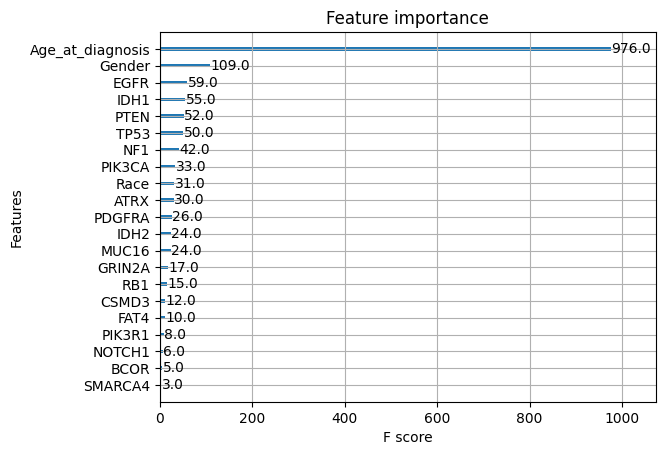

In [85]:
xgboost.plot_importance(model)
plt.show()

##  Модель на лучших признаках по feature importance

In [88]:
''' выбранные 12 признаков по feature importance'''

X = df[['Age_at_diagnosis', 'Gender', 'EGFR', 'IDH1', 'PTEN', 'NF1', 'TP53', 'PIK3CA', 'Race', 'ATRX', 'PDGFRA', 'IDH2']]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучаем градиентный бустинг деревьев (по умолчанию)
model = xgboost.XGBClassifier(scale_pos_weight=10) # создаем объект
model.fit(X_train, y_train) # обучаем его

# вычисляем выход на тесте
predictions = model.predict(X_test) #

# расчет метрик
print("выбранные 12 признаков по feature importance\n")
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

выбранные 12 признаков по feature importance

Accuracy: 0.8050541516245487
Precision: 0.8208092485549133
Recall: 0.8606060606060606
F1-score: 0.8402366863905325
ROC AUC: 0.8790584415584415
true negatives (GBM верно предсказаны): 81
false negatives (GBM ошибочно предсказаны как LGG): 23
true positives (LGG верно предсказаны): 142
false positives (LGG ошибочно предсказаны как GBM): 31


## 10-кратная кроссвалидация

In [184]:
X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = xgboost.XGBClassifier(scale_pos_weight=10)
results = cross_validate(
    model, X_train, y_train, cv=10, scoring='accuracy',
    return_estimator=True
)

# Находим индекс фолда с максимальной точностью
best_fold_idx = np.argmax(results['test_score'])
best_model = results['estimator'][best_fold_idx]

print("Лучшая модель из фолда", best_fold_idx)

# расчет метрик
print("результат с кроссвалидацией\n")
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = best_model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

Лучшая модель из фолда 7
результат с кроссвалидацией

Accuracy: 0.8194945848375451
Precision: 0.844311377245509
Recall: 0.8545454545454545
F1-score: 0.8493975903614458
ROC AUC: 0.8949404761904761
true negatives (GBM верно предсказаны): 86
false negatives (GBM ошибочно предсказаны как LGG): 24
true positives (LGG верно предсказаны): 141
false positives (LGG ошибочно предсказаны как GBM): 26


In [185]:
# Проверяем, поддерживает ли модель важность признаков
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_

    # Создаем DataFrame
    features = best_model.feature_names_in_ if hasattr(best_model, 'feature_names_in_') else [f"Feature_{i}" for i in range(X_train.shape[1])]

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

# Выбираем признаки с важностью выше медианы
selector = SelectFromModel(best_model, threshold='median')
selector.fit(X_train, y_train)

# Маска отобранных признаков

selected_mask = selector.get_support()
selected_features = np.array(features)[selected_mask]

print("Отобранные признаки:", selected_features, len(selected_features))


model = xgboost.XGBClassifier(scale_pos_weight=10) # создаем объект

X = df[selected_features]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучение модели
model.fit(X_train, y_train)

# расчет метрик
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

conf_m = confusion_matrix(y_test, y_pred)
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

Отобранные признаки: ['IDH1' 'TP53' 'PTEN' 'EGFR' 'MUC16' 'NF1' 'PIK3R1' 'RB1' 'NOTCH1'
 'GRIN2A' 'IDH2' 'FAT4'] 12
Accuracy: 0.7075812274368231
Precision: 0.6810344827586207
Recall: 0.9575757575757575
F1-score: 0.7959697732997482
ROC AUC: 0.898024891774892
true negatives (GBM верно предсказаны): 38
false negatives (GBM ошибочно предсказаны как LGG): 7
true positives (LGG верно предсказаны): 158
false positives (LGG ошибочно предсказаны как GBM): 74


## Модель на лучших признаках по матрице Крамера

In [90]:
''' лучшие признаки выбранные по матрице крамера'''

X = df[['Age_at_diagnosis','Gender','Race','IDH1', 'PTEN', 'ATRX', 'CIC', 'EGFR', 'FUBP1', 'NOTCH1', 'RB1']]
y = df['Grade']


# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучаем градиентный бустинг деревьев (по умолчанию)
model = xgboost.XGBClassifier(scale_pos_weight=10) # создаем объект
model.fit(X_train, y_train) # обучаем его

# вычисляем выход на тесте
predictions = model.predict(X_test) #

# расчет метрик
print('результат с лучшими признаками, выбранными по матрице крамера \n')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

результат с лучшими признаками, выбранными по матрице крамера 

Accuracy: 0.8303249097472925
Precision: 0.8511904761904762
Recall: 0.8666666666666667
F1-score: 0.8588588588588588
ROC AUC: 0.8853084415584416
true negatives (GBM верно предсказаны): 87
false negatives (GBM ошибочно предсказаны как LGG): 22
true positives (LGG верно предсказаны): 143
false positives (LGG ошибочно предсказаны как GBM): 25


# **CatBoost**

In [92]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [93]:
# библиотеки для CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

## Модель на всех признаках

In [176]:
''' все признаки '''

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)


# создаем модель CatBoostClassifier
model = CatBoostClassifier(iterations=500, # число моделей в ансамбле
                           learning_rate=1, # шаг обучения
                           depth=2, # глубина дерева
                           loss_function='MultiClass', # вид функции ошибки
                           class_weights = class_weights,
                           verbose=False)

# обучаем ансамбль
model.fit(train_dataset)
preds_class = model.predict(test_dataset)
preds_proba = model.predict_proba(test_dataset)

# метрики
print('все признаки')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

все признаки
Accuracy: 0.8339350180505415
Precision: 0.8742138364779874
Recall: 0.8424242424242424
F1-score: 0.8580246913580247
ROC AUC: 0.8883387445887446
true negatives (GBM верно предсказаны): 92
false negatives (GBM ошибочно предсказаны как LGG): 26
true positives (LGG верно предсказаны): 139
false positives (LGG ошибочно предсказаны как GBM): 20


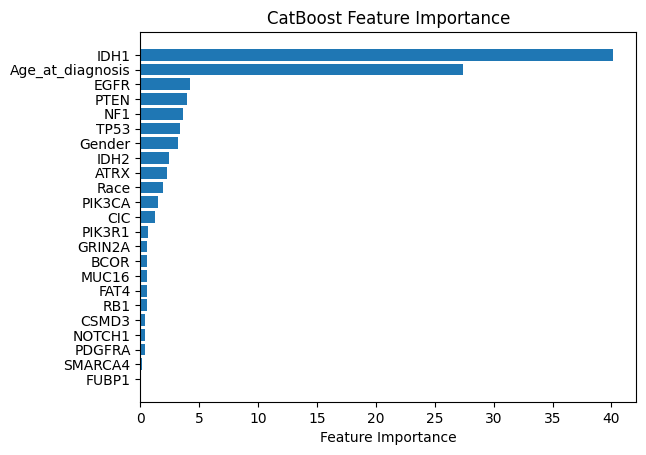

In [177]:
# Получение важности признаков
train_pool = Pool(X, y)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X.columns

# Сортировка и визуализация
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.show()

## Выбранные признаки по feature importance

In [207]:
''' выбранные 12 признаков по feature importance'''

X = df[['CIC', 'PIK3CA', 'Race', 'ATRX', 'IDH2','Gender','TP53','NF1','PTEN','EGFR','Age_at_diagnosis','IDH1']]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)


# создаем модель CatBoostClassifier
model = CatBoostClassifier(iterations=500, # число моделей в ансамбле
                           learning_rate=1, # шаг обучения
                           depth=2, # глубина дерева
                           loss_function='MultiClass', # вид функции ошибки
                           class_weights = class_weights,
                           verbose=False)

# обучаем ансамбль
model.fit(train_dataset)
preds_class = model.predict(test_dataset)
preds_proba = model.predict_proba(test_dataset)


# метрики
print('выбранные признаки по feature importance')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

выбранные признаки по feature importance
Accuracy: 0.8375451263537906
Precision: 0.879746835443038
Recall: 0.8424242424242424
F1-score: 0.8606811145510835
ROC AUC: 0.8892045454545454
true negatives (GBM верно предсказаны): 93
false negatives (GBM ошибочно предсказаны как LGG): 26
true positives (LGG верно предсказаны): 139
false positives (LGG ошибочно предсказаны как GBM): 19


 ## Модель с лучшими параметрами, найденными GridSearchCV -  максимизация f1 и acuracy

In [211]:
from sklearn.model_selection import GridSearchCV

In [144]:
'''максимизация f1'''

model = CatBoostClassifier(verbose=False)

params = {
    'depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5]
}

grid = GridSearchCV(model, params, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучшая f1:", grid.best_score_)

Лучшие параметры: {'depth': 2, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
Лучшая f1: 0.8948287573085484


In [198]:
'''с параметрами найденными с помощью GridSearchCV - максимизация f1'''
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

params = {'depth': 2, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.2, 'verbose': False, 'class_weights':class_weights}

# создаем модель CatBoostClassifier
model = CatBoostClassifier(**params)

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# обучаем ансамбль
model.fit(X_train, y_train)

# метрики
print('с параметрами найденными с помощью GridSearchCV -  максимизация f1')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

с параметрами найденными с помощью GridSearchCV -  максимизация f1
Accuracy: 0.8194945848375451
Precision: 0.8571428571428571
Recall: 0.8363636363636363
F1-score: 0.8466257668711656
ROC AUC: 0.8837932900432901
true negatives (GBM верно предсказаны): 89
false negatives (GBM ошибочно предсказаны как LGG): 27
true positives (LGG верно предсказаны): 138
false positives (LGG ошибочно предсказаны как GBM): 23


In [201]:
'''максимизация accuracy'''

model = CatBoostClassifier(verbose=False)

params = {
    'depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5]
}

grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)
print("Лучшая accuracy:", grid.best_score_)

Лучшие параметры: {'depth': 2, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
Лучшая accuracy: 0.8840707964601769


In [203]:
'''с параметрами найденными с помощью GridSearchCV - максимизация accuracy'''
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
params = {'depth': 2, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.2, 'verbose': False, 'class_weights': class_weights}

# создаем модель CatBoostClassifier
model = CatBoostClassifier(**params)

# обучаем ансамбль
model.fit(X_train, y_train)

# метрики
print('с параметрами найденными с помощью GridSearchCV -  максимизация accuracy')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

с параметрами найденными с помощью GridSearchCV -  максимизация accuracy
Accuracy: 0.855595667870036
Precision: 0.9251700680272109
Recall: 0.8242424242424242
F1-score: 0.8717948717948718
ROC AUC: 0.9011093073593073
true negatives (GBM верно предсказаны): 101
false negatives (GBM ошибочно предсказаны как LGG): 29
true positives (LGG верно предсказаны): 136
false positives (LGG ошибочно предсказаны как GBM): 11


 ## Модель с лучшими параметрами, найденными optuna

In [131]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.4 MB/s eta 0:00:00


In [ ]:
import optuna

In [139]:
''' Поиск лучших параметров '''
X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# Кросс-валидация (5 фолдов)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': False,
        'eval_metric': 'Recall'
    }

    scores = []
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=(X_val, y_val),
            early_stopping_rounds=50,
            verbose=False
        )
        y_pred = model.predict(X_val)
        scores.append(accuracy_score(y_val, y_pred))

    return np.mean(scores)

# Оптимизация
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Лучшие параметры:", study.best_params)
print("Лучшая accuracy:", study.best_value)

# Финальная модель с лучшими параметрами
best_model = CatBoostClassifier(**study.best_params, verbose=False)
best_model.fit(X, y)

[I 2025-06-07 17:32:26,219] A new study created in memory with name: no-name-16914178-9a75-4ffa-8a67-07a1415b8fca
[I 2025-06-07 17:32:33,979] Trial 0 finished with value: 0.8806814941545481 and parameters: {'iterations': 161, 'depth': 10, 'learning_rate': 0.23395745900263798, 'l2_leaf_reg': 10, 'random_strength': 1.017519483828931, 'bagging_temperature': 0.6003612502205835}. Best is trial 0 with value: 0.8806814941545481.
[I 2025-06-07 17:32:40,508] Trial 1 finished with value: 0.8770958083832335 and parameters: {'iterations': 901, 'depth': 10, 'learning_rate': 0.2082135579066867, 'l2_leaf_reg': 9, 'random_strength': 2.958769911547327, 'bagging_temperature': 0.7158865285202359}. Best is trial 0 with value: 0.8806814941545481.
[I 2025-06-07 17:32:41,104] Trial 2 finished with value: 0.8663743940690048 and parameters: {'iterations': 793, 'depth': 5, 'learning_rate': 0.013612090244573785, 'l2_leaf_reg': 10, 'random_strength': 3.7946389749066274, 'bagging_temperature': 0.21039834149002912}

Лучшие параметры: {'iterations': 473, 'depth': 7, 'learning_rate': 0.29673138509521535, 'l2_leaf_reg': 6, 'random_strength': 1.0462344202206488, 'bagging_temperature': 0.7010281225498157}
Лучшая accuracy: 0.8818719703450242


In [205]:
''' CatBoost с параметрами найденными с помощью optuna '''

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Параметры модели
params = {'iterations': 473,
          'depth': 7,
          'learning_rate': 0.29673138509521535,
          'l2_leaf_reg': 6,
          'random_strength': 1.0462344202206488,
          'bagging_temperature': 0.7010281225498157,
          'class_weights': class_weights}

# создаем модель CatBoostClassifier
model = CatBoostClassifier(**params)

# обучаем ансамбль
model.fit(train_dataset, early_stopping_rounds=50,
            verbose=False)
preds_class = model.predict(test_dataset)
preds_proba = model.predict_proba(test_dataset)


# метрики
print('CatBoost с параметрами найденными с помощью optuna')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

с параметрами найденными с помощью кросс-валидации
Accuracy: 0.8375451263537906
Precision: 0.8846153846153846
Recall: 0.8363636363636363
F1-score: 0.8598130841121495
ROC AUC: 0.9017316017316016
true negatives (GBM верно предсказаны): 94
false negatives (GBM ошибочно предсказаны как LGG): 27
true positives (LGG верно предсказаны): 138
false positives (LGG ошибочно предсказаны как GBM): 18


## Модель с выбранными признаками по feature importance c лучшими параметрами optuna

In [207]:
'''Модель с выбранными признаками по feature importance c лучшими параметрами optuna'''

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Параметры модели
params = {'iterations': 473,
          'depth': 7,
          'learning_rate': 0.29673138509521535,
          'l2_leaf_reg': 6,
          'random_strength': 1.0462344202206488,
          'bagging_temperature': 0.7010281225498157,
          'class_weights': class_weights}

''' выбранные 12 признаков по feature importance'''
X = df[['CIC', 'PIK3CA', 'Race', 'ATRX', 'IDH2','Gender','TP53','NF1','PTEN','EGFR','Age_at_diagnosis','IDH1']]
y = df['Grade']

# разбиение выборки на части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)


# создаем модель CatBoostClassifier
model = CatBoostClassifier(**params)

# обучаем ансамбль
model.fit(train_dataset, early_stopping_rounds=50,
            verbose=False)
preds_class = model.predict(test_dataset)
preds_proba = model.predict_proba(test_dataset)


# метрики
print('Модель с выбранными признаками по feature importance c лучшими параметрами optuna')
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


y_proba = model.predict_proba(X_test)[:, 1]
conf_m = confusion_matrix(y_test, y_pred)
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("true negatives (GBM верно предсказаны):", conf_m[0,0])
print("false negatives (GBM ошибочно предсказаны как LGG):", conf_m[1,0])
print("true positives (LGG верно предсказаны):", conf_m[1,1])
print("false positives (LGG ошибочно предсказаны как GBM):", conf_m[0,1])

тест на выбранных признаках + лучшие параметры optuna
Accuracy: 0.8303249097472925
Precision: 0.8831168831168831
Recall: 0.8242424242424242
F1-score: 0.8526645768025078
ROC AUC: 0.8924242424242426
true negatives (GBM верно предсказаны): 94
false negatives (GBM ошибочно предсказаны как LGG): 29
true positives (LGG верно предсказаны): 136
false positives (LGG ошибочно предсказаны как GBM): 18


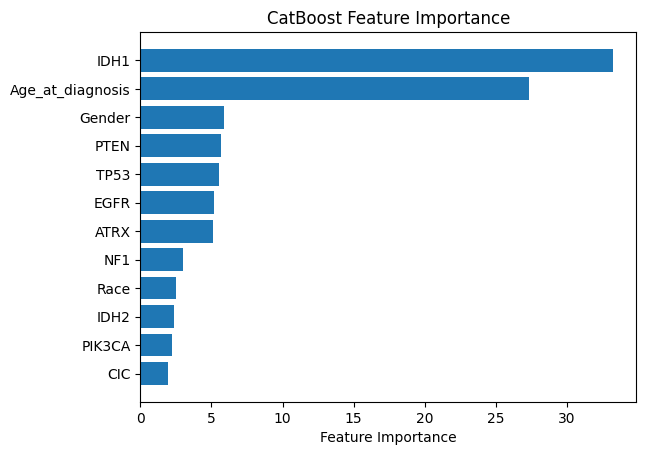

In [208]:
# Получение важности признаков
train_pool = Pool(X, y)
feature_importances = model.get_feature_importance(train_pool)
feature_names = X.columns

# Сортировка и визуализация
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance")
plt.show()

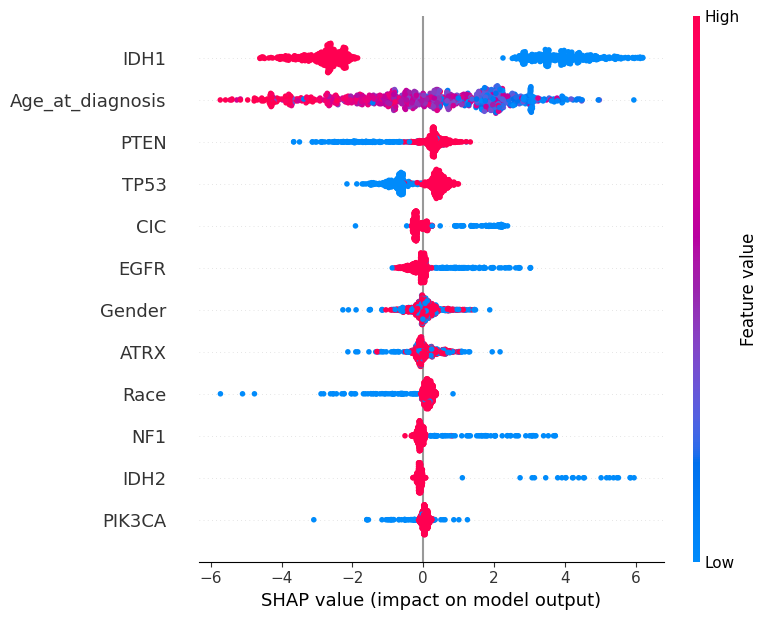

In [209]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_pool)
shap.summary_plot(shap_values, X, feature_names=X.columns)

#**MLP**

In [212]:
# библиотеки для MLP
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Первая реализация

In [188]:
X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# Определим числовые и категориальные признаки
cat_dataset = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis', 'Age_at_diagnosis'])
numeric_features = ['Age_at_diagnosis']
categorical_features = cat_dataset.columns

# Препроцессинг: нормализация числовых и one-hot кодирование категориальных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Преобразуем y в one-hot encoding
y_processed = keras.utils.to_categorical(y)

# Разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.33, random_state=42)

# Количество признаков после преобразования
num_features = X_train.shape[1]
num_classes = y_train.shape[1]

# Создание модели MLP
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(num_features,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                      keras.metrics.Precision(),
                      keras.metrics.Recall(),
                      keras.metrics.AUC()])

# Обучение модели
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Оценка модели
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)

# Вывод метрик
print("\n Основные метрики: ")
print(f"Точность (Accuracy): {test_acc:.4f}")
print(f"Потери (Loss): {test_loss:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"AUC: {test_auc:.4f}")

# Детальный отчет
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report")
print(classification_report(y_true, y_pred_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.7456 - auc_4: 0.8137 - loss: 0.5494 - precision_15: 0.7456 - recall_12: 0.7456 - val_accuracy: 0.8421 - val_auc_4: 0.9046 - val_loss: 0.4427 - val_precision_15: 0.8421 - val_recall_12: 0.8421
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8559 - auc_4: 0.9087 - loss: 0.3848 - precision_15: 0.8559 - recall_12: 0.8559 - val_accuracy: 0.8421 - val_auc_4: 0.8898 - val_loss: 0.4240 - val_precision_15: 0.8421 - val_recall_12: 0.8421
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8729 - auc_4: 0.9289 - loss: 0.3375 - precision_15: 0.8729 - recall_12: 0.8729 - val_accuracy: 0.8246 - val_auc_4: 0.8430 - val_loss: 0.5307 - val_precision_15: 0.8246 - val_recall_12: 0.8246
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9105 - auc_4: 0.9398 - loss: 0.2976 - precision_15: 0.9105 - recall_12: 0.9105 - val_accuracy: 0.8421 - val_auc_4: 0.9126 - val_loss: 0.4116 - val_precision_15: 0

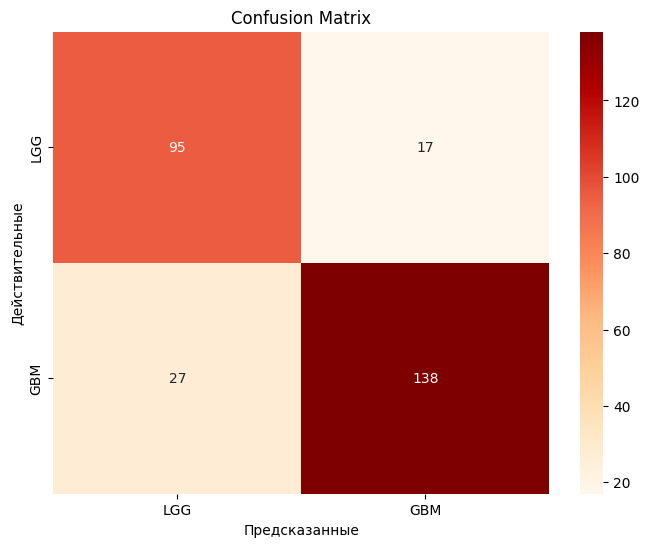

In [189]:
# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True,
            fmt='d',
            cmap='OrRd',
            xticklabels=['LGG', 'GBM'],
            yticklabels=['LGG', 'GBM'])


plt.xlabel('Предсказанные')
plt.ylabel('Действительные')
plt.title('Confusion Matrix')
plt.show()

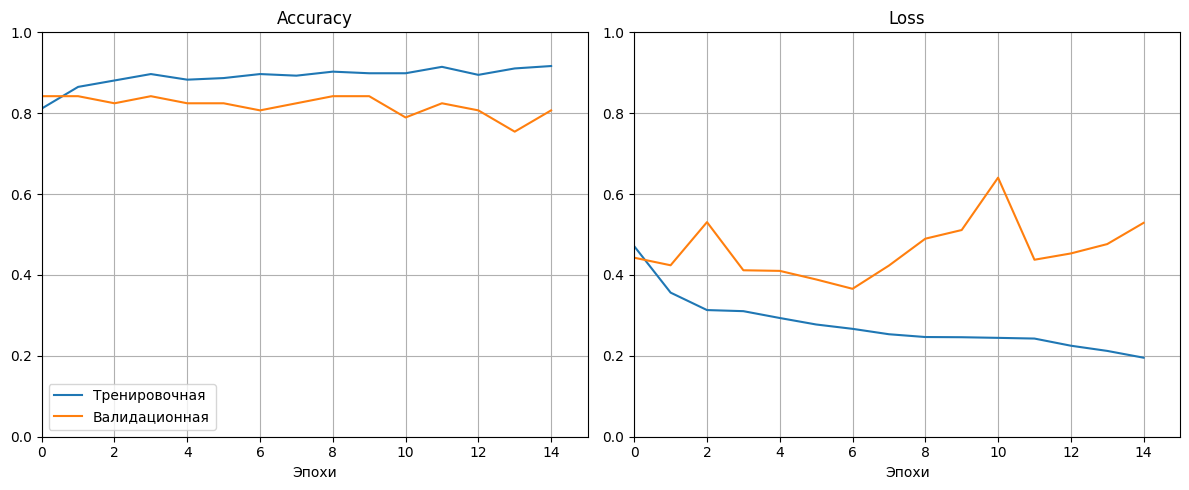

In [219]:
# Графики обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренировочная')
plt.plot(history.history['val_accuracy'], label='Валидационная')
plt.title('Accuracy')
plt.xlabel('Эпохи')
plt.ylim(0,1)
plt.xlim(0,15)
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Тренировочная')
plt.plot(history.history['val_loss'], label='Валидационная')
plt.title('Loss')
plt.tight_layout()
plt.xlabel('Эпохи')
plt.ylim(0,1)
plt.xlim(0,15)
plt.grid()
plt.show()

## Улучшенная версия

In [132]:
'''модель с добавлениеем Callbacks и F1-score'''

X = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis'])
y = df['Grade']

# Определим числовые и категориальные признаки
cat_dataset = df.drop(columns=['Grade','Case_ID', 'Project', 'Primary_Diagnosis', 'Age_at_diagnosis'])
numeric_features = ['Age_at_diagnosis']
categorical_features = cat_dataset.columns

# Препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)
y_processed = keras.utils.to_categorical(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y)

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))

class F1Score(keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = keras.metrics.Precision()
        self.recall = keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

def build_model(input_shape, num_classes):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=input_shape),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=[
            'accuracy',
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.AUC(name='auc'),
            F1Score()
        ]
    )
    return model

input_shape = (X_train.shape[1],)
num_classes = y_train.shape[1]
model = build_model(input_shape, num_classes)

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_recall'),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)
]

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# Метрики
test_loss, test_acc, test_precision, test_recall, test_auc, test_f1 = model.evaluate(X_test, y_test, verbose=0)

print("\nМетрики")
print(f"Точность (Accuracy): {test_acc:.4f}")
print(f"Потери (Loss): {test_loss:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"AUC: {test_auc:.4f}")
print(f"F1-score: {test_f1:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n Classification Report")
print(classification_report(y_true, y_pred_classes, target_names=['LGG', 'GBM']))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.6779 - auc: 0.7471 - f1_score: 0.6779 - loss: 0.9201 - precision: 0.6779 - recall: 0.6779 - val_accuracy: 0.8134 - val_auc: 0.8623 - val_f1_score: 0.8134 - val_loss: 0.5175 - val_precision: 0.8134 - val_recall: 0.8134 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8893 - auc: 0.9398 - f1_score: 0.8893 - loss: 0.3257 - precision: 0.8893 - recall: 0.8893 - val_accuracy: 0.8134 - val_auc: 0.8680 - val_f1_score: 0.8134 - val_loss: 0.5194 - val_precision: 0.8134 - val_recall: 0.8134 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8750 - auc: 0.9330 - f1_score: 0.8750 - loss: 0.3287 - precision: 0.8750 - recall: 0.8750 - val_accuracy: 0.8209 - val_auc: 0.8585 - val_f1_score: 0.8209 - val_loss: 0.5324 - val_precision: 0.8209 - val_recall: 0.8209 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8633 - auc: 0

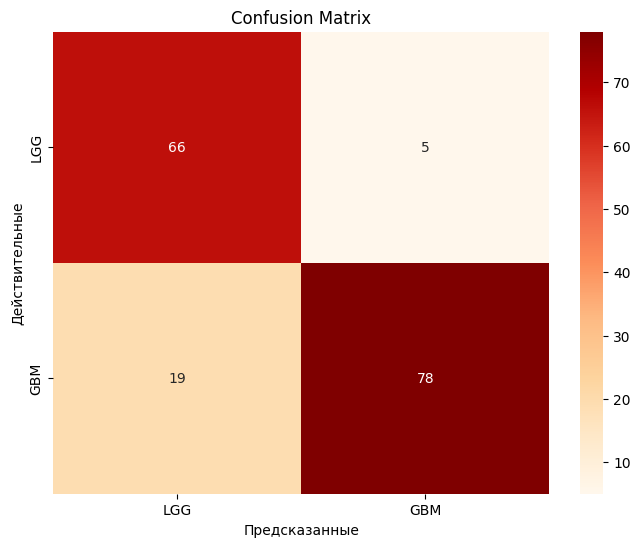

In [133]:
# Матрица ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True,
            fmt='d',
            cmap='OrRd',
            xticklabels=['LGG', 'GBM'],
            yticklabels=['LGG', 'GBM'])


plt.xlabel('Предсказанные')
plt.ylabel('Действительные')
plt.title('Confusion Matrix')
plt.show()

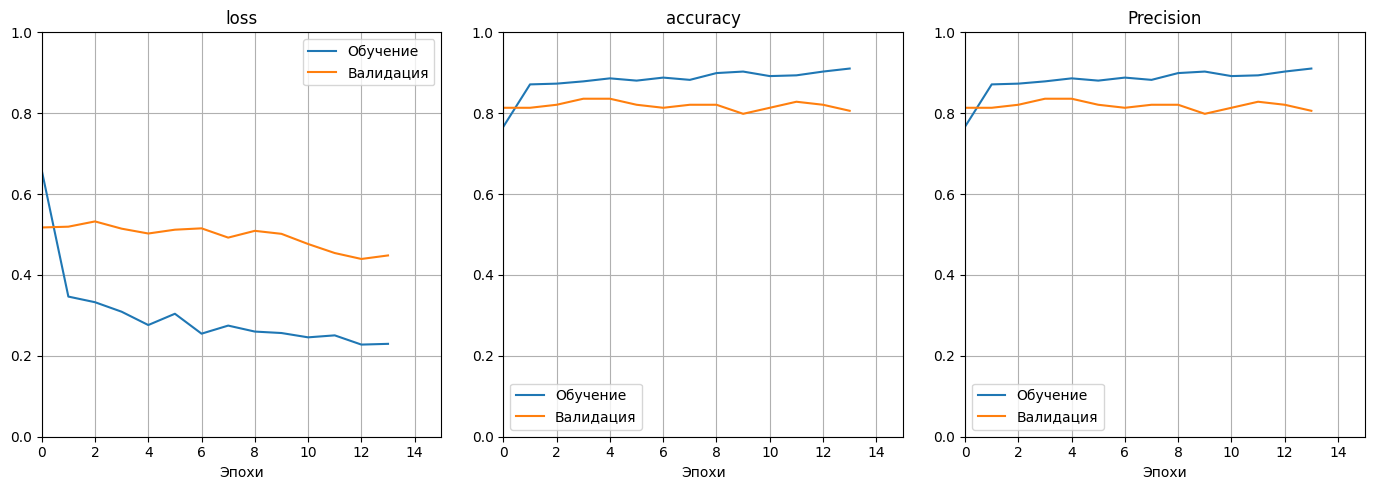

In [167]:
# Графики обучения
plt.figure(figsize=(14, 5))
metrics = ['loss', 'accuracy', 'precision', 'recall', 'auc', 'f1_score']
metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC', 'F1-score']

for i, metric in enumerate(metrics[:3]):
    plt.subplot(1, 3, i+1)
    plt.plot(history.history[metric], label='Обучение')
    plt.plot(history.history[f'val_{metric}'], label='Валидация')
    plt.title(metric_names[i])
    plt.xlabel('Эпохи')
    plt.legend()
    plt.ylim(0,1)
    plt.xlim(0,15)
    plt.grid()

plt.tight_layout()
plt.show()

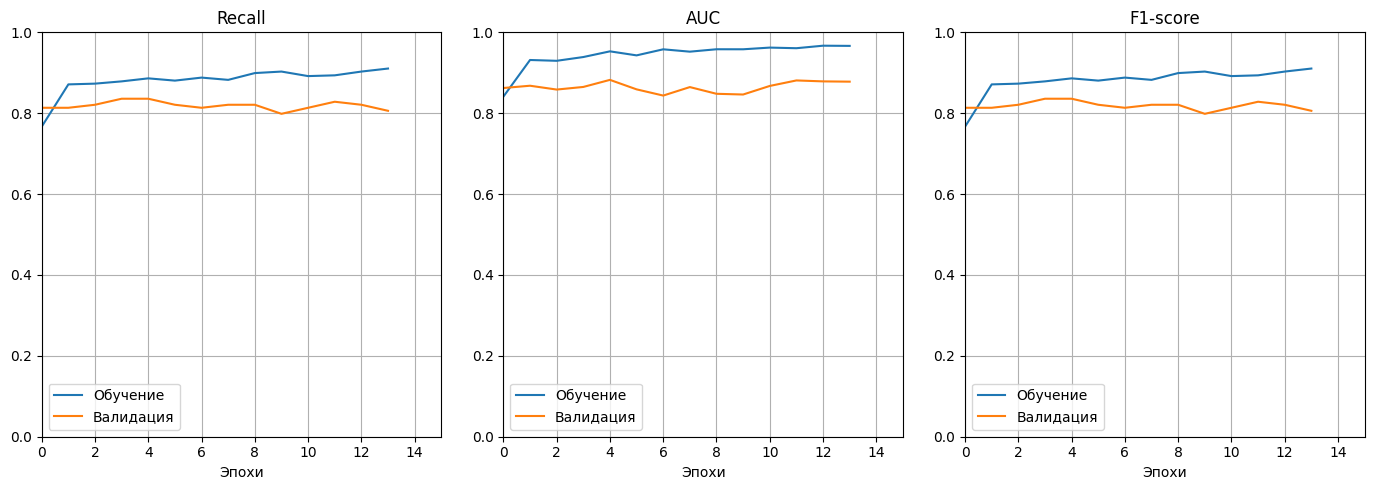

In [165]:
plt.figure(figsize=(14, 5))
for i, metric in enumerate(metrics[3:]):
    plt.subplot(1, 3, i+1)
    plt.plot(history.history[metric], label='Обучение')
    plt.plot(history.history[f'val_{metric}'], label='Валидация')
    plt.title(metric_names[i+3])
    plt.xlabel('Эпохи')
    plt.legend()
    plt.ylim(0,1)
    plt.xlim(0,15)
    plt.grid()

plt.tight_layout()
plt.show()

# Визуализация результатов

In [94]:
# библиотеки для визуализаций
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Сравнение лучших моделей по acuracy

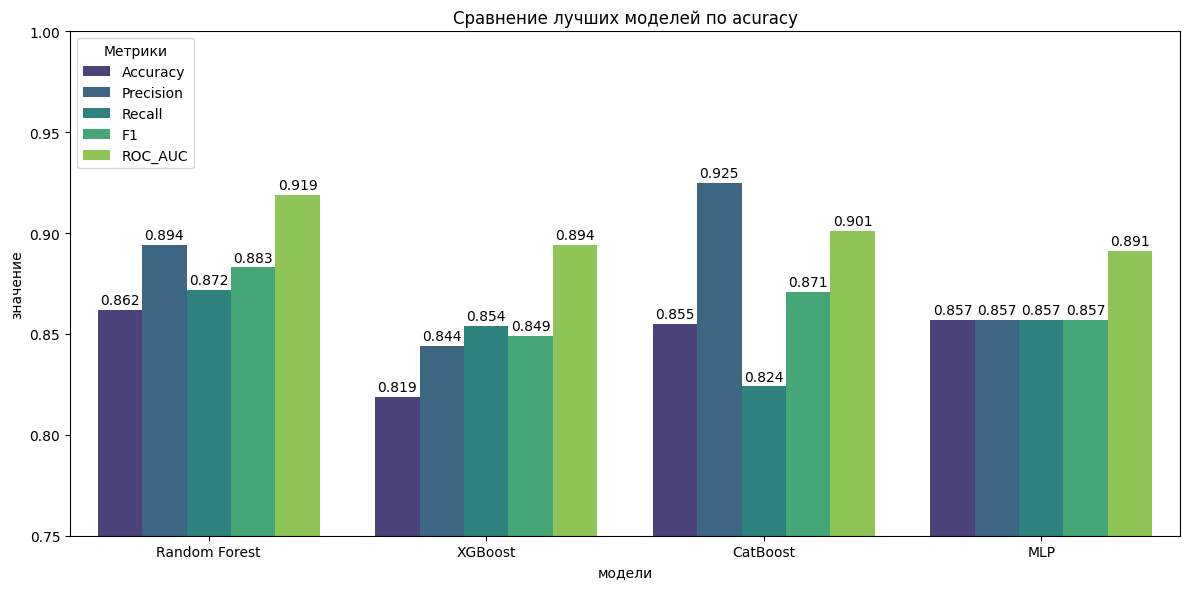

In [95]:
''' лучшие модели по acuracy '''

# Загрузка данных
result_df = pd.read_excel("/content/accuracy_models_max.xlsx")

df_melted = result_df.melt(id_vars=["model_name", "description"],
                    value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"],
                    var_name="Metric", value_name="Value")

# Построение графика
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x="model_name", y="Value", hue="Metric", palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=2)

plt.xticks()
plt.ylim(0.75, 1)
plt.title("Сравнение лучших моделей по acuracy")
plt.tight_layout()
plt.legend(title='Метрики', loc = 'upper left')
plt.xlabel('модели')
plt.ylabel('значение')
plt.show()

## Частота появления лучших признаков в моделях

<ipython-input-87-2672130352>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_df.index, y=freq_df['Count'], palette="crest")


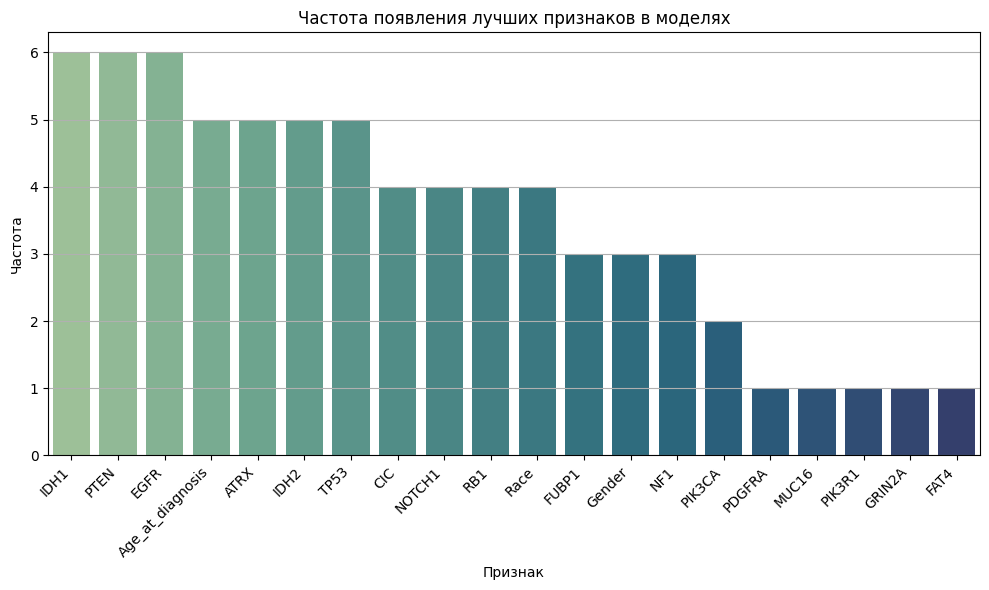

In [87]:
# random forest - лучшие признаки по feature importance
rf_feat_imp = 'IDH1,Age_at_diagnosis,ATRX,PTEN,CIC,IDH2,TP53,NOTCH1,FUBP1,EGFR,RB1'

# random forest - лучшие признаки после 10-кратной кросс-валидации
rf_cros = 'Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,FUBP1,RB1,NOTCH1,IDH2'

# XGBoost - лучшие признаки по feature importance
XG_feat_imp = 'Age_at_diagnosis,Gender,EGFR,IDH1,PTEN,NF1,TP53,PIK3CA,Race,ATRX,PDGFRA,IDH2'

# XGBoost - лучшие признаки после 10-кратной кросс-валидации
XG_cros = 'IDH1,TP53,PTEN,EGFR,MUC16,NF1,PIK3R1,RB1,NOTCH1,GRIN2A,IDH2,FAT4'

# лучшие признаки по матрице Крамера
kramer = 'Age_at_diagnosis,Gender,Race,IDH1,PTEN,ATRX,CIC,EGFR,FUBP1,NOTCH1,RB1'

# CatBoost - лучшие признаки по feature importance
CatB_feat_imp = 'CIC,PIK3CA,Race,ATRX,IDH2,Gender,TP53,NF1,PTEN,EGFR,Age_at_diagnosis,IDH1'

# подсчет частоты каждого признака
all_features = ",".join([
    rf_feat_imp, rf_cros, XG_feat_imp, XG_cros, kramer, CatB_feat_imp
]).split(',')

feature_counts = Counter(all_features)

freq_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Count'])
freq_df = freq_df.sort_values(by='Count', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_df.index, y=freq_df['Count'], palette="crest")
plt.xticks(rotation=45, ha='right')
plt.title("Частота появления лучших признаков в моделях")
plt.ylabel("Частота")
plt.xlabel("Признак")
plt.tight_layout()
plt.grid(axis='y')
plt.show()